In [1]:
import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras import datasets, Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dataset = datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

In [4]:
class_names = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'angle boot']

In [5]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [6]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


[]

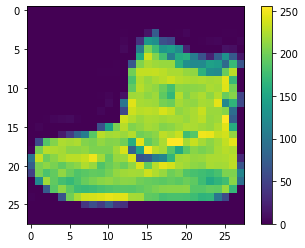

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.plot()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

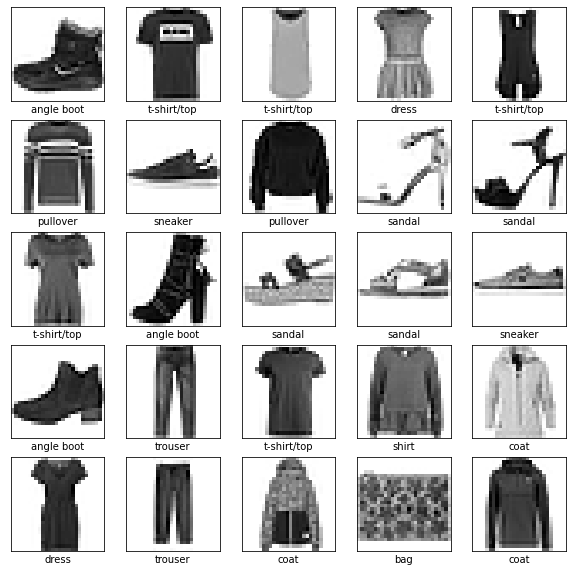

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(128, activation=tf.nn.relu),
                    Dense(10, activation=tf.nn.softmax)
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1148 - accuracy: 0.9568
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1157 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1107 - accuracy: 0.9585
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.9585
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1079 - accuracy: 0.9590


In [39]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy = ", test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.4786 - accuracy: 0.8887
Test accuracy =  0.888700008392334


In [40]:
predictions = model.predict(test_images)

In [41]:
predictions[0]

array([2.0749816e-16, 1.5258611e-26, 4.1029569e-15, 2.5818838e-31,
       2.8258565e-19, 2.2956146e-07, 3.4217250e-20, 7.3370467e-07,
       6.1762190e-19, 9.9999905e-01], dtype=float32)

In [42]:
np.argmax(predictions[0])

9

In [43]:
test_labels[0]

9